In [1]:
import tensorflow as tf
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt
from tkinter import messagebox
import smtplib
import smtplib
import ssl
from email.mime.text import MIMEText
from email.utils import formataddr
from email.mime.multipart import MIMEMultipart  # New line
from email.mime.base import MIMEBase  # New line
from email import encoders  # New lin

In [2]:
model = keras.models.load_model(r'cnn2.h5')

In [3]:
model

In [4]:
a = (50,50,3)
b = [1,*a]
b

[1, 50, 50, 3]

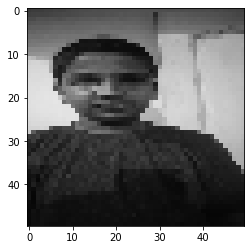

In [51]:
img_path = 'Chintu1.jpg'

master_I= cv2.imread(img_path)
master_I = cv2.cvtColor(master_I,cv2.COLOR_BGR2RGB)
orig_image = cv2.cvtColor(master_I, cv2.COLOR_RGB2GRAY)
image = cv2.resize(orig_image,(50,50))
image = image.reshape((*image.shape,1)) # as tf.image.grayscale_to_rgb requires last dimension to be 1, see why reshape link
image = tf.convert_to_tensor(image)  # as tf.image.grayscale_to_rgb requires tensor for processing.
image = tf.image.grayscale_to_rgb(image).numpy()/255. # .numpy will convert dtype to numpy from tf
# we need to reshape image to [batch_size, row, col, channel] to feed it to model for prediction
final_image = image.reshape(1, *image.shape) 

plt.imshow(final_image[0],cmap='gray')

In [14]:
final_image[0].shape

(50, 50, 3)

In [52]:
model.predict(final_image)

array([[9.990207e-01, 9.792732e-04]], dtype=float32)

In [57]:
is_mask = tf.math.argmax(model.predict(final_image), 1).numpy()[0]  # it gives the index value of maximum
is_mask
SUBJECT = "Subject"
TEXT = "One Visitor violated Face Mask Policy. See in the camera to recognize user. A Person has been detected without a face mask in the Hotel Lobby Area 9. Please Alert the authorities."
if(is_mask == 0):
    # Throw a Warning Message to tell user to wear a mask if not wearing one. This will stay
    # open and No Access will be given He/She wears the mask
    #     messagebox.showwarning("Warning","Access Denied. Please wear a Face Mask")
    print("Not ")
#     Send an email to the administrator if access denied/user not wearing face mask
#     message = 'Subject: {}\n\n{}'.format(SUBJECT, TEXT)
#     mail = smtplib.SMTP('smtp.gmail.com', 587)
#     mail.ehlo()
#     mail.starttls()
#     mail.login('prabhusumantha77@gmail.com', 'Sumu@1234')
#     mail.sendmail('prabhusumantha77@gmail.com',
#                   'sumanthprabhu2000@gmail.com', message)
#     mail.close
    sender_email = 'facemask.projectSV@gmail.com'
    sender_name = 'Sumanth_prabhu'
    password = input('Please, type your password:\n')
    receiver_emails = ['sumanthprabhu2000@gmail.com']
    receiver_names = ['vivan Athreya']
    # Email body
    email_html = open('email.html')
    email_body = email_html.read()
    filename = 'Chintu1.jpg'
    for receiver_email, receiver_name in zip(receiver_emails, receiver_names):
        print("Sending the email...")
        # Configurating user's info
        msg = MIMEMultipart()
        msg['To'] = formataddr((receiver_name, receiver_email))
        msg['From'] = formataddr((sender_name, sender_email))
        msg['Subject'] = 'One Person Detected without mask'
        

        msg.attach(MIMEText(email_body, 'html'))
        try:
            # Open PDF file in binary mode
            with open(filename, "rb") as attachment:
                part = MIMEBase("application", "octet-stream")
                part.set_payload(attachment.read())
            # Encode file in ASCII characters to send by email
            encoders.encode_base64(part)
            # Add header as key/value pair to attachment part
            part.add_header(
                "Content-Disposition",
                f"attachment; filename= {filename}",
            )
            msg.attach(part)
        except Exception as e:
            print(f'Oh no! We didn\'t found the attachment!\n{e}')
            break
        try:
#             steykdzaesbdnfpv
            # Creating a SMTP session | use 587 with TLS, 465 SSL and 25
            server = smtplib.SMTP('smtp.gmail.com', 587)
            # Encrypts the email
            context = ssl.create_default_context()
            server.starttls(context=context)
            # We log in into our Google account
            server.login(sender_email, password)
            # Sending email from sender, to receiver with the email body
            server.sendmail(sender_email, receiver_email, msg.as_string())
            print('Email sent!')
        except Exception as e:
            print(f'Oh no! Something bad happened!\n{e}')
            break
        finally:
            print('Closing the server...')
            server.quit()

else:
    pass


Not 
Please, type your password:
steykdzaesbdnfpv
Sending the email...
Email sent!
Closing the server...


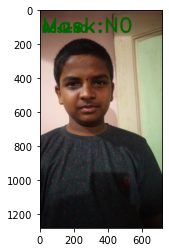

In [56]:
def mask(img):
    if is_mask:
        plt.imshow(cv2.putText(img,
                    'Mask:Yes', (1,130),
                    fontFace=cv2.FONT_HERSHEY_DUPLEX,
                    fontScale=1,
                    color=(0,100,0),thickness=7))
        print("1")
    else:
        plt.imshow(cv2.putText(img,
                    'Mask:N0', (10,130),
                    fontFace=cv2.FONT_HERSHEY_DUPLEX,
                    fontScale=4,
                    color=(0,100,0),thickness=7))
# mask(0)
mask(master_I)